In [28]:
import tensorflow as tf
import h5py
import matplotlib.pyplot as plt
import numpy as np
import math


def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def relu(x):
    return max(0, x)    

def convert_to_one_hot(y, C):
    y = np.eye(C)[y.reshape(-1)].T
    return y

def load_2D_dataset():
    data = scipy.io.loadmat('DL/data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T

    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y, s=40, cmap=plt.cm.Spectral);
    
    return train_X, train_Y, test_X, test_Y


def initialize_parameters(layer_dims):
    np.random.seed(3)
    L = len(layer_dims)
    parameters = {}
    
    for l in range(1, L):
        
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
        assert(parameters['W' + str(l)].shape == layer_dims[l], 1)
    return parameters 


def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    z1 = np.dot(W1, X) + b1
    a1 = np.maximum(0, z1)
    z2 = np.dot(W2, a1) + b2
    a2 = np.maximum(0, z2)
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)

    return a3, cache

def backward_propagation(X, y, cache):
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3-y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims=True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims=True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims=True)
    
    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}
    
    return gradients

def update_parameters(parameters, grads, learning_rate):
    
    n = len(parameters) // 2

    for k in range(n):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * grads["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * grads["db" + str(k+1)]
        
    return parameters     

def predict(X, y, parameters):
    
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    a3, caches = forward_propagation(X, parameters)
    
    for i in range(0, a3.shape[1]):
        if a3[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p

def compute_cost(a3, y):
    m = y.shape[1]
    logprobs = np.multiply(-np.log(a3), y) + np.multiply(-np.log(1 - a3), 1- y)
    cost = 1. / m * np.sum(logprobs)
    
    return cost 

<>:41: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:42: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:41: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:42: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_8154/3342243899.py:41: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_8154/3342243899.py:42: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], 1)


In [29]:
def compute_cost_with_regularization(a3, y, parameters, lambd):
    
    m = y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = compute_cost(a3, y)
    
    L2_regularization_cost = (1./m) * (lambd / 2) * (np.sum(np.square(W1)) + np.sum(np.square(W2))+np.sum(np.square(W3)))
    cost = cross_entropy_cost + L2_regularization_cost
    return cost 

def backward_propagation_with_regularization(X, y, cache, lambd):
    
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3-y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims=True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims=True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims=True)
    
    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}
    
    return gradients                                                                              
                                                                              
                                                                              
def backward_propagation_with_dropout(X, y, cache, lambd):
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3) = cache
    
    dz3 = 1./m * (a3-y)
    dW3 = np.dot(dz3, a2.T)
    db3 = np.sum(dz3, axis=1, keepdims=True)
    
    da2 = np.dot(W3.T, dz3)
    dz2 = np.multiply(da2, np.int64(a2 > 0))
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims=True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis=1, keepdims=True)
    
    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2, "dW3": dW3, "db3": db3}
    
    return gradients   

def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    d1 = np.random.rand(a1.shape[0], a1.shape[1]) < keep_prob
    a1 = np.multiply(a1, d1)
    a1 /= keep_prob
    
    z2 = np.dot(W2, a1) + b1
    a2 = relu(z2)
    d2 = np.random.rand(a2.shape[0], a2.shape[1]) < keep_prob
    a2 = np.multiply(a2, d2)
    a2 /= keep_prob
    
    z3 = np.dot(W3, a2) + b3
    a3 = sigmoid(z3)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2, z3, a3, W3, b3)

    return a3, cache
    

 the 0 iteration loss is : 0.689511
 the 10000 iteration loss is : 0.484802
 the 20000 iteration loss is : 0.765439


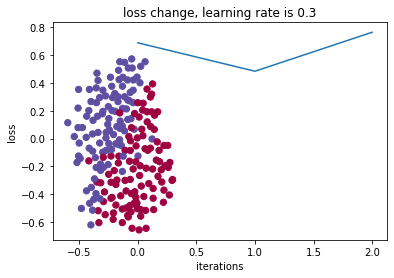

train set accuracy:
Accuracy: 0.943127962085308
test set accuracy:
Accuracy: 0.94


/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_8154/3342243899.py:100: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = np.zeros((1,m), dtype = np.int)


In [30]:
def model(X, y, learning_rate = 0.3, num_iterations=30000, lambd=0, keep_prob=1):
    
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 20, 3, 1]
    
    parameters = initialize_parameters(layers_dims)
    
    for i in range(0, num_iterations):
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
            
        if lambd == 0:
            cost = compute_cost(a3, y)
        else:
            cost = compute_cost_with_regularization(a3, y, parameters, lambd)
            
        assert(lambd == 0 or keep_prob == 1)
        
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, y, cache, keep_prob)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 10000 == 0:
            print(" the %i iteration loss is : %f" % (i, cost))
            costs.append(cost)
        
    plt.plot(costs)
    plt.ylabel('loss')
    plt.xlabel('iterations')
    plt.title('loss change, learning rate is ' + str(learning_rate))
    plt.show()
    return parameters 
    
if __name__ == '__main__':
    
    train_X, train_y, test_X, test_y = load_2D_dataset()
    
    parameters = model(train_X, train_y, lambd=0.7)
    
    print('train set accuracy:')
    predictions_train = predict(train_X, train_y, parameters)
    
    print('test set accuracy:')
    predictions_test = predict(test_X, test_y, parameters)
        

 the 0 iteration loss is : 0.708577
 the 10000 iteration loss is : 0.558693
 the 20000 iteration loss is : 0.907707


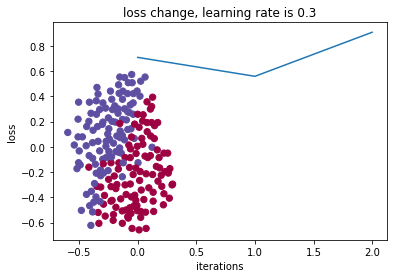

train set accuracy:
Accuracy: 0.943127962085308
test set accuracy:
Accuracy: 0.94


/var/folders/fw/8cyt130j3w99h2qvmlbj79700000gn/T/ipykernel_8154/3342243899.py:100: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  p = np.zeros((1,m), dtype = np.int)


In [31]:
if __name__ == '__main__':
    
    train_X, train_y, test_X, test_y = load_2D_dataset()
    
    parameters = model(train_X, train_y, lambd=0.86)
    
    print('train set accuracy:')
    predictions_train = predict(train_X, train_y, parameters)
    
    print('test set accuracy:')
    predictions_test = predict(test_X, test_y, parameters)